# OUTLIER

In [1]:
#outlier is far away far data 
#outlier:Outliers are those data points that are significantly different from the rest of the dataset. 
#They are often abnormal observations that skew the data distribution,
#and arise due to inconsistent data entry, or erroneous observations.
#only for columnwise and numerical column
#2 methods handle outlier 1>drop 2>impute
#impute is having 2 method -:1>SD (standard deviation)-Gaussian distribution
#2>IQR-skew data

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
data1=pd.read_excel(r"C:\Users\Admin\Documents\GitHub\edu-python\LungCap.xls")
data1

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [4]:
LC=data1['LungCap(cc)']
LC

0       6.475
1      10.125
2       9.550
3      11.125
4       4.800
        ...  
720     5.725
721     9.050
722     3.850
723     9.825
724     7.100
Name: LungCap(cc), Length: 725, dtype: float64

In [5]:
data1=data1.drop(['LungCap(cc)'],axis=1)

In [6]:
data1['LC']=LC

In [7]:
data1.head()

,Age( years),Height(inches),Smoke,Gender,Caesarean,LC
0,6,62.1,no,male,no,6.475
1,18,74.7,yes,female,no,10.125
2,16,69.7,no,female,yes,9.550
3,14,71.0,no,male,no,11.125
4,5,56.9,no,male,no,4.800


In [8]:
data1.shape

(725, 6)

In [9]:
data1.duplicated().sum()

0

In [10]:
data1.describe()

,Age( years),Height(inches),LC
count,725.000000,725.000000,725.000000
mean,12.326897,64.836276,7.863148
std,4.004750,7.202144,2.662008
min,3.000000,45.300000,0.507000
25%,9.000000,59.900000,6.150000
50%,13.000000,65.400000,8.000000
75%,15.000000,70.300000,9.800000
max,19.000000,81.800000,14.675000


In [11]:
data1.isnull().sum()

Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Caesarean         0
LC                0
dtype: int64

In [12]:
data1.dtypes

Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Caesarean          object
LC                float64
dtype: object

In [13]:
data1.Smoke.value_counts()

no     648
yes     77
Name: Smoke, dtype: int64

In [14]:
data1.Smoke.replace({"no":0,"yes":1},inplace=True)

In [15]:
data1.Smoke.value_counts()

0    648
1     77
Name: Smoke, dtype: int64

In [16]:
data1.dtypes

Age( years)         int64
Height(inches)    float64
Smoke               int64
Gender             object
Caesarean          object
LC                float64
dtype: object

In [17]:
data1.Gender.value_counts()

male      367
female    358
Name: Gender, dtype: int64

In [18]:
data1.Gender.replace({"male":0,"female":1},inplace=True)

In [19]:
data1.Gender.value_counts()

0    367
1    358
Name: Gender, dtype: int64

In [20]:
data1.dtypes

Age( years)         int64
Height(inches)    float64
Smoke               int64
Gender              int64
Caesarean          object
LC                float64
dtype: object

In [21]:
data1.Caesarean.value_counts()

no     561
yes    164
Name: Caesarean, dtype: int64

In [22]:
data1.Caesarean.replace({"no":0,"yes":1},inplace=True)

In [23]:
data1.Caesarean.value_counts()

0    561
1    164
Name: Caesarean, dtype: int64

In [24]:
data1.dtypes

Age( years)         int64
Height(inches)    float64
Smoke               int64
Gender              int64
Caesarean           int64
LC                float64
dtype: object

In [25]:
data1_cor=data1.corr()
data1_cor

,Age( years),Height(inches),Smoke,Gender,Caesarean,LC
Age( years),1.000000,0.835737,0.211232,0.030312,0.056339,0.819675
Height(inches),0.835737,1.000000,0.176534,-0.141441,0.060397,0.912187
Smoke,0.211232,0.176534,1.000000,0.053528,0.038330,0.101374
Gender,0.030312,-0.141441,0.053528,1.000000,-0.013070,-0.169823
Caesarean,0.056339,0.060397,0.038330,-0.013070,1.000000,0.021317
LC,0.819675,0.912187,0.101374,-0.169823,0.021317,1.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

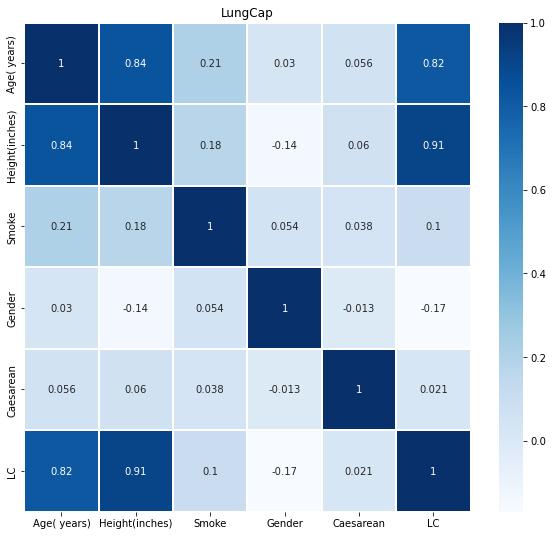

In [27]:
plt.figure(figsize=(10,9))
heatmap=sns.heatmap(data1_cor,linewidth=2,annot=True,cmap=plt.cm.Blues)
plt.title("LungCap")
plt.show()

In [28]:
#Age and LC has 2nd highest ve correlation 
#Height and LC has highest +ve correlation 
#LC and Caesarean has Lowest correlation compared to other columns

In [29]:
#1 Method
outliers=[]
def detect_outliers(var):
    threshold=3
    mean=np.mean(var)
    std=np.std(var)
    
    for i in var:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [30]:
out=detect_outliers(LC)
out

[]

In [31]:
#2 to remove outlier
def remove_outliers(df,col,k=2.5):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x> mean-k*sd)]
    final_list=[x for x in df[col] if (x< mean+k*sd)]
    df1=df.loc[df[col].isin(final_list)];
    print(df1.shape);return(df1)

In [32]:
#remove_outliers(data1,"LC",k=2)

# Imputation

In [33]:
#GD=SD
data1["LC"].describe()

count    725.000000
mean       7.863148
std        2.662008
min        0.507000
25%        6.150000
50%        8.000000
75%        9.800000
max       14.675000
Name: LC, dtype: float64

<AxesSubplot:>

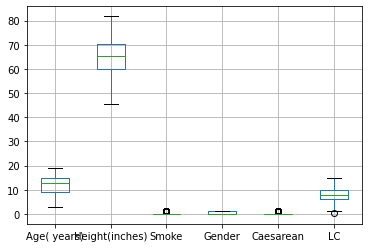

In [34]:
data1.boxplot()

<AxesSubplot:ylabel='LC'>

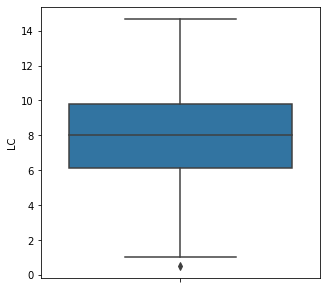

In [35]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data1,y="LC")

<AxesSubplot:>

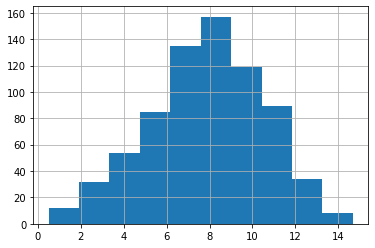

In [36]:
data1.LC.hist()

<AxesSubplot:xlabel='LC', ylabel='Density'>

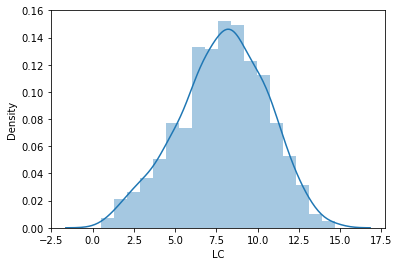

In [37]:
sns.distplot(data1.LC)

In [38]:
ub=data1["LC"].mean()+3*data1["LC"].std()
lb=data1["LC"].mean()-3*data1["LC"].std()
print(ub,lb)

15.849172332243054 -0.12287715982926262


In [39]:
data1.loc[data1["LC"]<0,"LC"]=0

<AxesSubplot:>

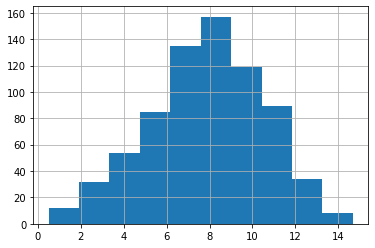

In [40]:
data1.LC.hist()#Graph is not changed beacuse there are no outlies in #3SD

<AxesSubplot:xlabel='LC', ylabel='Density'>

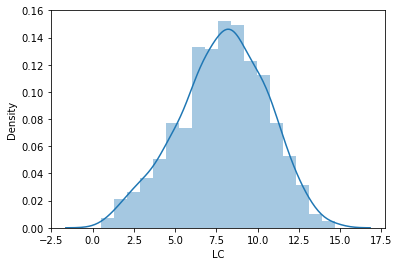

In [41]:
sns.distplot(data1.LC) #GRAPH IS NOT CHANGED BEACUSE THERE ARE NO OUTLIERS IN #3SD

# IQR Method

In [42]:
data2=pd.read_csv(r"C:\Users\Admin\Documents\GitHub\edu-python\Credit_Risk_data.csv")
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
data2.shape

(614, 13)

In [45]:
data2=data2.drop(["Loan_ID"],axis=1)
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [46]:
#Imputation
data2.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [47]:
data2.Gender=data2.Gender.fillna("Female")

In [48]:
data2.Gender.value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

In [49]:
data2.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
data2.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [51]:
data2.Married=data2.Married.fillna('No')

In [52]:
data2.Married.value_counts()

Yes    398
No     216
Name: Married, dtype: int64

In [53]:
data2.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
data2.Self_Employed.value_counts() 

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [55]:
data2.Self_Employed=data2.Self_Employed.fillna("Yes")

In [56]:
data2.Self_Employed.value_counts()

No     500
Yes    114
Name: Self_Employed, dtype: int64

In [57]:
data2.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
data2.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [59]:
data2.Dependents=data2.Dependents.fillna("3+")

In [60]:
data2.Dependents.value_counts()

0     345
1     102
2     101
3+     66
Name: Dependents, dtype: int64

In [61]:
data2.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
data2.LoanAmount=data2.LoanAmount.fillna(data2.LoanAmount.mean())

In [63]:
data2.Loan_Amount_Term .value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [64]:
data2.Loan_Amount_Term=data2.Loan_Amount_Term.fillna(12.0)

In [65]:
data2.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
data2.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [67]:
data2.Credit_History=data2.Credit_History.fillna(0.0)

In [68]:
data2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data-type Conversion

In [69]:
data2.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [70]:
data2.Gender.value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

In [71]:
data2.Gender.replace({"Male":0,"Female":1},inplace=True)

In [72]:
data2.dtypes

Gender                 int64
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [73]:
data2.Married.value_counts()   

Yes    398
No     216
Name: Married, dtype: int64

In [74]:
data2.Married.replace({"Yes":0,"No":1},inplace=True)

In [75]:
data2.Education.value_counts() 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [76]:
data2.Education.replace({"Graduate":0,"Not Graduate":1},inplace=True)

In [77]:
data2.Self_Employed.value_counts() 

No     500
Yes    114
Name: Self_Employed, dtype: int64

In [78]:
data2.Self_Employed.replace({"No":0,"Yes":1},inplace=True)

In [79]:
data2.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [80]:
data2.Loan_Status.replace({"Y":0,"N":1},inplace=True)

In [81]:
data2.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [82]:
data2.Dependents.value_counts()

0     345
1     102
2     101
3+     66
Name: Dependents, dtype: int64

In [83]:
data2.Dependents.replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)

In [84]:
data2.Property_Area.replace({"Semiurban":0,"Urban":1,"Rural":2},inplace=True)

In [85]:
data2.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [86]:
data2.skew()

Gender               1.475893
Married              0.622252
Dependents           0.912335
Education            1.367622
Self_Employed        1.620738
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.460484
Credit_History      -1.310835
Property_Area        0.162812
Loan_Status          0.809998
dtype: float64

In [87]:
#data2.isnull().sum()

<AxesSubplot:>

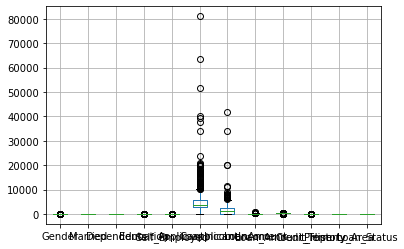

In [88]:
data2.boxplot()

<AxesSubplot:ylabel='ApplicantIncome'>

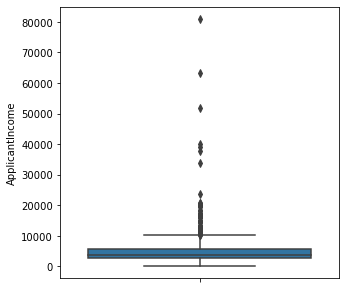

In [89]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data2,y="ApplicantIncome")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

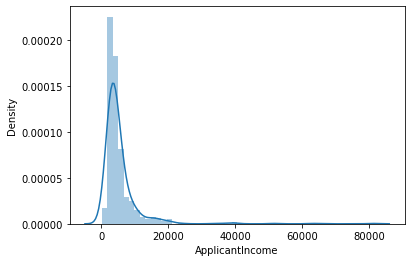

In [90]:
sns.distplot(data2.ApplicantIncome) 

<AxesSubplot:>

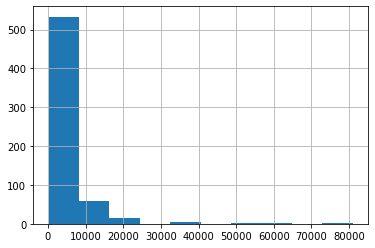

In [91]:
data2.ApplicantIncome.hist()

In [92]:
data2.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [93]:
IQR1=data2.ApplicantIncome.quantile(0.75)-data2.ApplicantIncome.quantile(0.25)
IQR1

2917.5

In [94]:
ub1=data2.ApplicantIncome.quantile(0.75)+3*IQR1
lb1=data2.ApplicantIncome.quantile(0.25)-3*IQR1
print(ub1,lb1)

14547.5 -5875.0


In [95]:
data2.loc[data2["ApplicantIncome"]>14547,"ApplicantIncome"]=14547

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

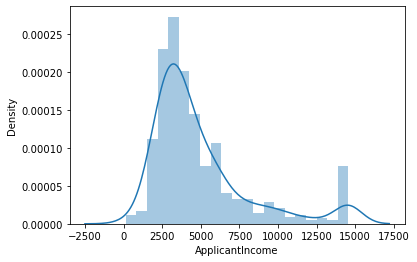

In [96]:
sns.distplot(data2.ApplicantIncome) 

<AxesSubplot:>

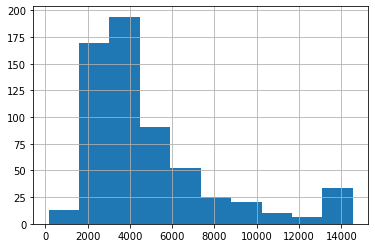

In [97]:
data2.ApplicantIncome.hist()

In [98]:
data2.skew()

Gender               1.475893
Married              0.622252
Dependents           0.912335
Education            1.367622
Self_Employed        1.620738
ApplicantIncome      1.710840
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.460484
Credit_History      -1.310835
Property_Area        0.162812
Loan_Status          0.809998
dtype: float64

<AxesSubplot:ylabel='CoapplicantIncome'>

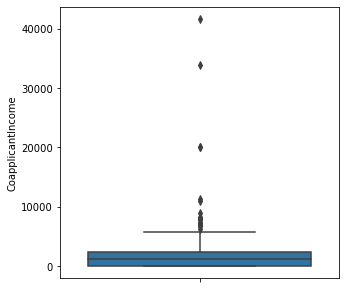

In [99]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data2,y="CoapplicantIncome")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

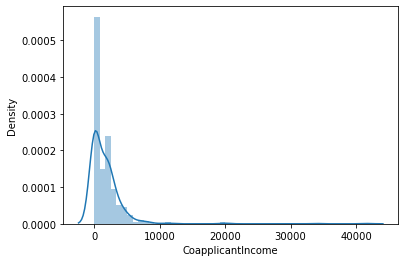

In [100]:
sns.distplot(data2.CoapplicantIncome) 

<AxesSubplot:>

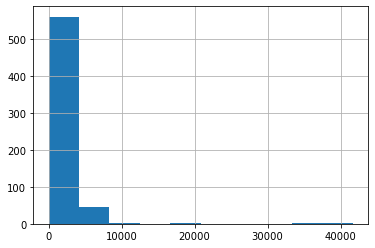

In [101]:
data2.CoapplicantIncome.hist()

In [102]:
data2.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [103]:
IQR2=data2.CoapplicantIncome.quantile(0.75)-data2.CoapplicantIncome.quantile(0.25)
IQR2

2297.25

In [104]:
ub1=data2.CoapplicantIncome.quantile(0.75)+3*IQR2
lb1=data2.CoapplicantIncome.quantile(0.25)-3*IQR2
print(ub1,lb1)

9189.0 -6891.75


In [105]:
data2.loc[data2["CoapplicantIncome"]>9189,"CoapplicantIncome"]=9189

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

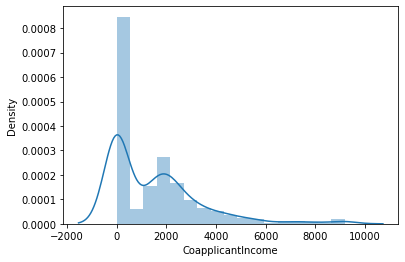

In [106]:
sns.distplot(data2.CoapplicantIncome) 

<AxesSubplot:>

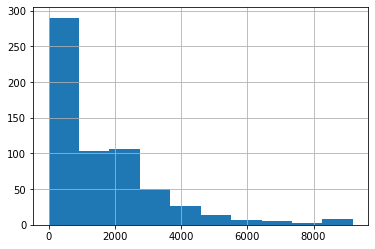

In [107]:
data2.CoapplicantIncome.hist()

In [108]:
data2.skew()

Gender               1.475893
Married              0.622252
Dependents           0.912335
Education            1.367622
Self_Employed        1.620738
ApplicantIncome      1.710840
CoapplicantIncome    1.657233
LoanAmount           2.726601
Loan_Amount_Term    -2.460484
Credit_History      -1.310835
Property_Area        0.162812
Loan_Status          0.809998
dtype: float64

<AxesSubplot:ylabel='LoanAmount'>

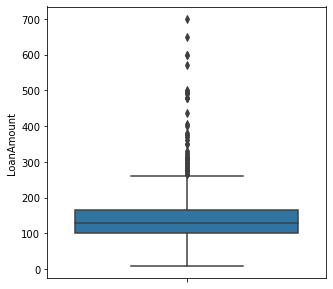

In [109]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(data=data2,y="LoanAmount")

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

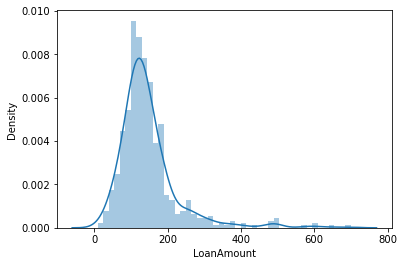

In [110]:
sns.distplot(data2.LoanAmount) 

<AxesSubplot:>

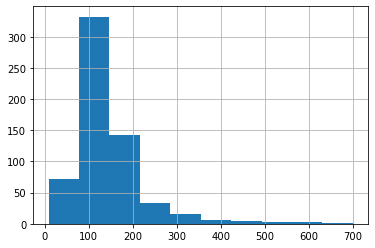

In [111]:
data2.LoanAmount.hist()

In [112]:
data2.LoanAmount.describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [113]:
IQR3=data2.LoanAmount.quantile(0.75)-data2.LoanAmount.quantile(0.25)
IQR3

64.5

In [114]:
ub1=data2.LoanAmount.quantile(0.75)+3*IQR3
lb1=data2.LoanAmount.quantile(0.25)-3*IQR3
print(ub1,lb1)

358.25 -93.25


In [115]:
data2.loc[data2["LoanAmount"]>358,"LoanAmount"]=358

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

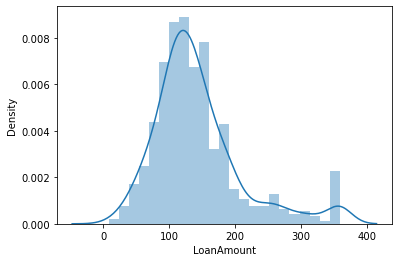

In [116]:
sns.distplot(data2.LoanAmount) 

<AxesSubplot:>

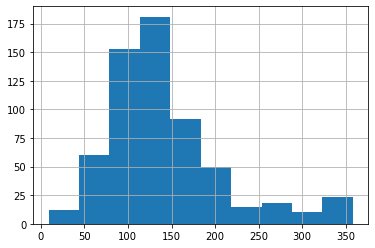

In [117]:
data2.LoanAmount.hist()

In [118]:
data2.skew()

Gender               1.475893
Married              0.622252
Dependents           0.912335
Education            1.367622
Self_Employed        1.620738
ApplicantIncome      1.710840
CoapplicantIncome    1.657233
LoanAmount           1.379054
Loan_Amount_Term    -2.460484
Credit_History      -1.310835
Property_Area        0.162812
Loan_Status          0.809998
dtype: float64

# Skewness Treatment

In [119]:
data2.skew()

Gender               1.475893
Married              0.622252
Dependents           0.912335
Education            1.367622
Self_Employed        1.620738
ApplicantIncome      1.710840
CoapplicantIncome    1.657233
LoanAmount           1.379054
Loan_Amount_Term    -2.460484
Credit_History      -1.310835
Property_Area        0.162812
Loan_Status          0.809998
dtype: float64

In [120]:
#+ve skewed squareroot,cuberoot, log
#-ve skewed: square transformation
#for log transformation 

In [121]:
#data2['ApplicantIncome']=np.sqrt(data2['ApplicantIncome'])

In [122]:
#data2.ApplicantIncome.skew()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

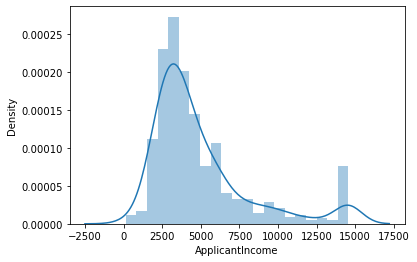

In [123]:
sns.distplot(data2.ApplicantIncome) 

In [124]:
#data2['ApplicantIncome']=np.cbrt(data2['ApplicantIncome'])

In [125]:
#data2.ApplicantIncome.skew()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

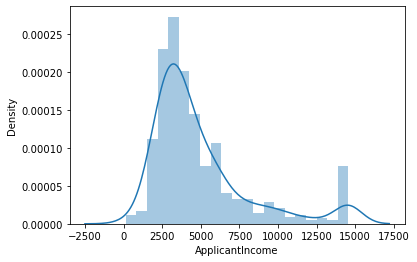

In [126]:
sns.distplot(data2.ApplicantIncome) 

In [127]:
d1=data2[data2.ApplicantIncome>0]

In [128]:
d1.shape

(614, 12)

In [129]:
data2['ApplicantIncome']=np.log(data2['ApplicantIncome'])

In [130]:
data2.ApplicantIncome.skew()

-0.18693779816599507

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

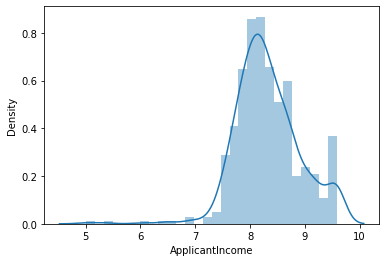

In [131]:
sns.distplot(data2.ApplicantIncome) 

In [132]:
#data2['CoapplicantIncome']=np.sqrt(data2['CoapplicantIncome'])

In [133]:
#data2.CoapplicantIncome.skew()

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

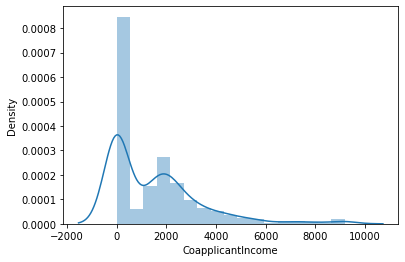

In [134]:
sns.distplot(data2.CoapplicantIncome) 

In [135]:
#data2['CoapplicantIncome']=np.cbrt(data2['CoapplicantIncome'])

In [136]:
#data2.CoapplicantIncome.skew()

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

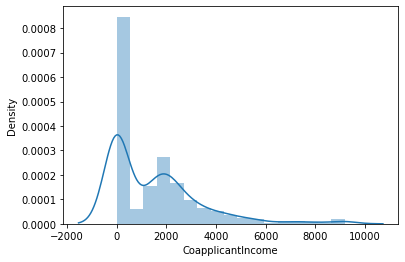

In [137]:
sns.distplot(data2.CoapplicantIncome) 

In [138]:
data2['CoapplicantIncome']=np.log(data2['CoapplicantIncome'])

In [139]:
data2.CoapplicantIncome.skew()

nan

In [140]:
#data2['LoanAmount']=np.sqrt(data2['LoanAmount'])

In [141]:
#data2.LoanAmount.skew()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

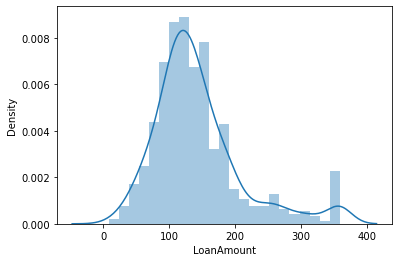

In [142]:
sns.distplot(data2.LoanAmount) 

In [143]:
#data2['LoanAmount']=np.cbrt(data2['LoanAmount'])

In [144]:
#data2.LoanAmount.skew()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

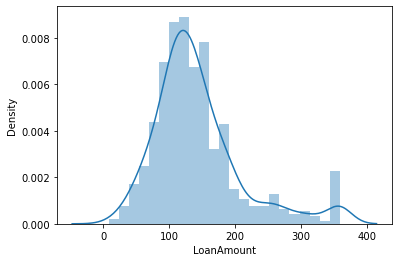

In [145]:
sns.distplot(data2.LoanAmount) 

In [146]:
data2['LoanAmount']=np.log(data2['LoanAmount'])

In [147]:
data2.LoanAmount.skew()

-0.5902675118396652

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

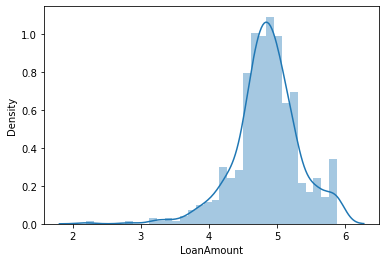

In [148]:
sns.distplot(data2.LoanAmount) 